## Goal: Use a Neural Network with 1 hidden layer on the MNIST Dataset

In this exercise, we will create a neural network, containing 1 hidden layer.

Aims:
1. Practice loading/saving a dataset from torchvision 
2. Processing data - normalizing/reshaping data
3. Create a neural network
4. Train a neural network
5. Test a neural network
6. Evaluate performance of the neural network

Reference:

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#Compose the transforms by first converting to tensor, then normalizing. 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))  ])

training_data = torchvision.datasets.MNIST(root = './data_MNIST',
                                          train = True,
                                          download = True,
                                          transform = transform)

test_data = torchvision.datasets.MNIST(root = './data_MNIST',
                                      train = False,
                                      download = True,
                                      transform = transform)

trainloader = torch.utils.data.DataLoader(training_data,
                                          batch_size = 4,
                                          shuffle = True,
                                          num_workers = 2)

testloader = torch.utils.data.DataLoader(test_data,
                                      batch_size = 4,
                                      shuffle = True,
                                      num_workers = 2)


In [3]:
def show_image(img):
    img = img* 0.3081 + 0.1307
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    #imshow takes in a matrix of dimension (m x n x 3)

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

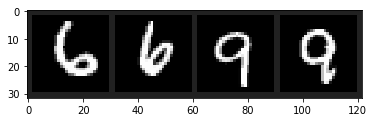

In [5]:
show_image(torchvision.utils.make_grid(images, nrow = 8))

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super().__init__()
        self.h1 = nn.Linear(in_dim, hid_dim)
        self.h2 = nn.Linear(hid_dim, out_dim)
        
    def forward(self, x):
        x = self.h1(x)
        x = F.relu(x)
        x = self.h2(x)
        
        return x


In [7]:
import torch.optim as optim

net = Net(in_dim = 28*28, hid_dim = 128, out_dim = 10)

optimizer = optim.SGD(net.parameters(), lr = 0.005)

loss = nn.CrossEntropyLoss()

## Train the NN on the training data

In [8]:
#set the number of epochs
epochs = 2
for epoch in range(epochs): 
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs,labels = data
        inputs,labels = Variable(inputs), Variable(labels)
        #reshaping the data to fit into the neural net
        inputs = inputs.view(4,784)
        #output of neural net
        output = net(inputs)
        #loss of output and label under crossentropy
        cur_loss = loss(output, labels)
        #zero the gradient buffers
        optimizer.zero_grad()
        #calculate gradients
        cur_loss.backward()
        #take a step back
        optimizer.step()
        
        running_loss = running_loss + cur_loss
        if i%2000 == 1999:
            print('iteration =', i,',loss =', running_loss.data/2000)
            running_loss = 0
        
        
        
        

iteration = 1999 ,loss = tensor(0.6046)
iteration = 3999 ,loss = tensor(0.3265)
iteration = 5999 ,loss = tensor(0.2555)
iteration = 7999 ,loss = tensor(0.2511)
iteration = 9999 ,loss = tensor(0.2063)
iteration = 11999 ,loss = tensor(0.1955)
iteration = 13999 ,loss = tensor(0.1765)
iteration = 1999 ,loss = tensor(0.1538)
iteration = 3999 ,loss = tensor(0.1295)
iteration = 5999 ,loss = tensor(0.1400)
iteration = 7999 ,loss = tensor(0.1253)
iteration = 9999 ,loss = tensor(0.1313)
iteration = 11999 ,loss = tensor(0.1083)
iteration = 13999 ,loss = tensor(0.1061)


## We estimate the generalization error by testing on our test set

In [9]:
correct = np.zeros(10)
total = np.zeros(10)
for i, data in enumerate(testloader,0):
    inputs,labels = data
    inputs,labels = Variable(inputs), Variable(labels)
    #reshaping the data
    inputs = inputs.view(4,784)
    output = net(inputs)
    output = output.max(1)[1]
    for i in range(4):
        if labels[i] == output[i]:
            correct[labels[i]] = correct[labels[i]] + 1
        total[labels[i]] = total[labels[i]] + 1


In [10]:
#accuracy for individual numbers
for i in range(10):
    print('Accuracy for',i ,':' ,np.round(correct[i]/total[i]*100,1) ,'%')
#overall accuracy:
print('Overall Accuracy :', np.round(np.sum(correct)/np.sum(total)*100,1), '%' )

Accuracy for 0 : 98.6 %
Accuracy for 1 : 99.0 %
Accuracy for 2 : 98.4 %
Accuracy for 3 : 96.3 %
Accuracy for 4 : 94.8 %
Accuracy for 5 : 97.3 %
Accuracy for 6 : 97.2 %
Accuracy for 7 : 96.3 %
Accuracy for 8 : 93.9 %
Accuracy for 9 : 95.7 %
Overall Accuracy : 96.8 %


prediction: [7 2 7 2]
actual:     [7 2 7 2]


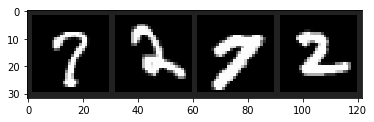

In [13]:
# now print some results
# get some random training images
test_dataiter = iter(testloader)
images, labels = test_dataiter.next()
show_image(torchvision.utils.make_grid(images, nrow = 8))
print('prediction:' , net(images.view(4,28*28)).max(1)[1].numpy() )
print('actual:    ', labels.numpy())